### Import libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from numpy import loadtxt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Dense
from tensorflow.keras import layers
from sklearn.model_selection import KFold

In [2]:
from keras import metrics

In [3]:
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error

In [6]:
import time

In [18]:
import statistics #for mean computation of metrics

## Evaluate feature selection datasets in MLR to pick the best

In [117]:
from sklearn.model_selection import train_test_split

In [116]:
rf_data = pd.read_csv(r"D:\Thesis\RandomForest2.csv") 
sff_data = pd.read_csv(r"D:\Thesis\SFF2.csv") 
vif_data = pd.read_csv(r"D:\Thesis\VIF2.csv") 

Define features and target

In [134]:
#For RF Data
rf_data_x = rf_data.iloc[:,1:5]
rf_data_y = rf_data.iloc[:,-1]


#For SFF Data
sff_data_x = sff_data.iloc[:,1:5]
sff_data_y = sff_data.iloc[:,-1]

#For VIF Data
vif_data_x = vif_data.iloc[:,1:5]
vif_data_y = vif_data.iloc[:,-1]


In [135]:
from sklearn.linear_model import LinearRegression

In [138]:
from sklearn.linear_model import LinearRegression
def MLR_Model(X_train,y_train):
    mlr = LinearRegression()
    mlr.fit(X_train,y_train)
    y_pred=mlr.predict(x_test)
    Accuracy=r2_score(y_test,y_pred)*100
    return Accuracy #outputs the accuracy score

### Train and predict

In [149]:
r2_scores=[]
fs_methods = ['Random Forest','Sequential Forward Feature','Variance Inflation Factor']

In [150]:
# evaluating random forest dataset
x_train,x_test,y_train,y_test=train_test_split(rf_data_x,rf_data_y,test_size=0.2,random_state=0)
r2_scores.append(MLR_Model(x_train,y_train))
print(f"R-squared score for RF: {MLR_Model(x_train,y_train)}")

R-squared score for RF: 21.011372013402706


In [151]:
# evaluating sequential forward feature selection dataset
x_train,x_test,y_train,y_test=train_test_split(sff_data_x,sff_data_y,test_size=0.2,random_state=0)
r2_scores.append(MLR_Model(x_train,y_train))
print(f"R-squared score for SFF: {MLR_Model(x_train,y_train)}")

R-squared score for SFF: 10.053434753612366


In [152]:
# evaluating variance inflation factor dataset
x_train,x_test,y_train,y_test=train_test_split(vif_data_x,vif_data_y,test_size=0.2,random_state=0)
r2_scores.append(MLR_Model(x_train,y_train))
print(f"R-squared score for SFF: {MLR_Model(x_train,y_train)}")

R-squared score for SFF: 17.957034583949373


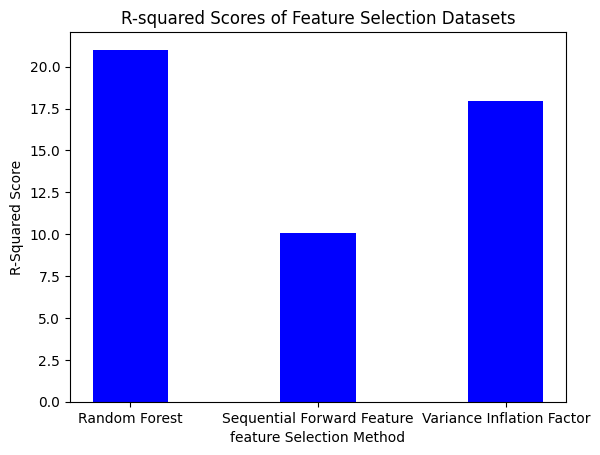

In [154]:
plt.bar(fs_methods, r2_scores, color ='blue', 
        width = 0.4)
 
plt.xlabel("feature Selection Method")
plt.ylabel("R-Squared Score")
plt.title("R-squared Scores of Feature Selection Datasets")
plt.show()

# Modelling

This project will evaluate the performance of the original dataset (without the feature selection) and the random forest dataset (has the highest R-squared value) 

### Creating MLR Model

In [5]:
from sklearn.linear_model import LinearRegression

In [7]:
from sklearn.linear_model import LinearRegression
def MLR_Model(X_train,y_train):
    mlr = LinearRegression()
    mlr.fit(X_train,y_train)
    return mlr

### Creating Hybrid ANN MLR Model

In [8]:
def ANN_Model (initial_weights,bias,neurons = 1,learning_rate=0.01, input_shape=16, activation='relu'): 
    model = Sequential()
    model.add(Input(shape = X_train.shape[1])) # number of input features 
    model.add(Dense(neurons, activation = activation, name = 'hidden')) # one neuron in hidden layer, relu activation
    model.add(Dense(1,activation = 'linear')) # one neuron in output layer, linear activation


    #initialize weights and bias in hidden layer
    hidden_layer = model.get_layer('hidden')
    #layer.set_weights([weights_array, bias_array])
    hidden_layer.set_weights([np.array([initial_weights]).reshape((16, 1)), np.array([bias])])


    #compile 
    model.compile(loss='mean_absolute_error',optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),metrics = [metrics.mean_absolute_error,tf.keras.metrics.RootMeanSquaredError()])
    return model

In [37]:
X

weathercode (wmo code)                  1.00
temperature_2m (°C)                    25.15
relativehumidity_2m (%)                78.36
dewpoint_2m (°C)                       20.88
rain (mm)                            1701.00
surface_pressure (hPa)                975.30
cloudcover (%)                        100.00
et0_fao_evapotranspiration (mm)         0.16
vapor_pressure_deficit (kPa)            0.75
Wind_Direction                          6.00
Wind_Speed_(km/h)                       4.10
windgusts_10m (km/h)                    9.40
soil_temperature_28_to_100cm (°C)      26.01
soil_moisture_28_to_100cm (m³/m³)       0.28
direct_radiation (W/m²)               140.02
diffuse_radiation (W/m²)               70.89
Name: 0, dtype: float64

## Original Dataset (Hybrid Model)

### Import dataset

In [9]:
whole_data = pd.read_csv(r"D:\Thesis\Without_Outliers2.csv") 

In [10]:
whole_data.head()

,Unnamed: 0,Year,Location,Wind_Direction,Wind_Speed_(km/h),temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),surface_pressure (hPa),et0_fao_evapotranspiration (mm),...,soil_moisture_28_to_100cm (m³/m³),direct_radiation (W/m²),diffuse_radiation (W/m²),rain (mm),weathercode (wmo code),windgusts_10m (km/h),cloudcover (%),Production (mt),Area (ha),Yield (mt/ha)
0,0,1990,AGUSAN DEL NORTE,6,4.1,25.15,78.360000,20.88,975.30,0.16,...,0.28,140.02,70.89,1701.0,1,9.4,100.0,226.68,200.0,1.133400
1,1,1991,AGUSAN DEL NORTE,8,3.1,25.06,77.990000,20.73,975.55,0.16,...,0.27,138.79,73.80,1634.2,1,11.5,100.0,231.68,204.0,1.135686
2,2,1992,AGUSAN DEL NORTE,8,3.1,25.39,77.139973,20.11,975.90,0.17,...,0.21,144.62,73.53,1433.2,1,7.9,100.0,219.08,199.0,1.100905
3,3,1993,AGUSAN DEL NORTE,8,3.6,24.92,79.600000,20.94,975.66,0.15,...,0.28,136.18,72.02,2017.8,1,8.3,100.0,231.47,203.0,1.140246
4,4,1994,AGUSAN DEL NORTE,6,3.6,24.96,79.450000,20.96,975.32,0.15,...,0.29,137.68,71.24,1722.0,1,8.6,100.0,238.09,208.0,1.144663


### Define features and target

In [11]:
#define target and predictors 

X = whole_data[['weathercode (wmo code)', 'temperature_2m (°C)',
       'relativehumidity_2m (%)', 'dewpoint_2m (°C)', 'rain (mm)',
       'surface_pressure (hPa)', 'cloudcover (%)',
       'et0_fao_evapotranspiration (mm)', 'vapor_pressure_deficit (kPa)',
       'Wind_Direction', 'Wind_Speed_(km/h)', 'windgusts_10m (km/h)',
       'soil_temperature_28_to_100cm (°C)',
       'soil_moisture_28_to_100cm (m³/m³)', 'direct_radiation (W/m²)',
       'diffuse_radiation (W/m²)']]

In [12]:
y = whole_data['Yield (mt/ha)']

## Training the hybrid model using original dataset


In [13]:
#metrics of all the datasets

r2_all= []
mae_all=[]
rmse_all=[]
exec_time = []

In [20]:
start_time = time.time()

#initializing KFold object
kfold = KFold(n_splits=10,shuffle=True, random_state=42) #random_state is for reproducability
r2=[]
mae=[]
rmse = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  # Predictors for train & test
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]  # Target for train, test

    # scaling fetaure sets 
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    mlr_model = MLR_Model(X_train,y_train) #perform MLR
    ann_model = ANN_Model(mlr_model.coef_,mlr_model.intercept_) #Intercept and coeff of MLR will be initailzied as ANN weights
    ann_model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=0) #fit ann model to data
    y_pred = ann_model.predict(X_test) #use ann model to predict test set
    mae.append(mean_absolute_error(y_test, y_pred))  #measure mean absolute value
    r2.append(r2_score(y_test,y_pred))#measure R-squared value
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    print(f"Intercept: {mlr_model.intercept_}")
    print(f"Coefficients: {list(zip(mlr_model.coef_))}")

end_time = time.time()
execution_time = end_time - start_time
exec_time.append(execution_time)
r2_all.append("{:.2f}".format(statistics.mean(r2)))
mae_all.append(("{:.2f}".format(statistics.mean(mae))))
rmse_all.append(("{:.2f}".format(statistics.mean(rmse))))
print(f" R-squared: {statistics.mean(r2):.2f}, MAE: {statistics.mean(mae):.2f}, RMSE: {statistics.mean(rmse):.2f}")
print(f"Execution time: {execution_time} seconds")


3/3 [==============================] - 0s 0s/step
Intercept: 0.7947303437178834
Coefficients: [(0.05313095918327541,), (-0.5476592649180987,), (-0.6118874643581756,), (0.5202472072796256,), (-0.22289618143232243,), (-0.1670847080613103,), (-0.057585813711760366,), (0.1319028051044666,), (-0.5155230783302909,), (-0.03155879655941255,), (0.04129673557420371,), (0.050837414804058415,), (0.1752598375244271,), (-0.013879427563714727,), (-0.06662433276261995,), (0.17177365826470045,)]
3/3 [==============================] - 0s 8ms/step
Intercept: 0.7921671186406988
Coefficients: [(0.041636293634991814,), (-0.5939554316899117,), (-0.5653681469865415,), (0.49985836585755916,), (-0.19360555742001145,), (-0.16052695321309846,), (-0.051852551180919054,), (0.08392060338577531,), (-0.4417155460891814,), (-0.04185246902350035,), (0.0449732882101354,), (0.03374972915200331,), (0.23378844412277475,), (-0.020994866812323515,), (-0.04371862628156871,), (0.16523079276822603,)]
3/3 [=======================

In [33]:
X_train[0]

array([-0.4097891 ,  0.0891454 , -2.57597848, -0.70416824, -0.9709004 ,
       -0.13574045,  0.06681531,  0.72082876,  2.00195613,  0.17268243,
       -0.48970014, -0.67443219, -0.02323283, -1.83065863, -0.03783108,
       -0.40487492])

In [35]:
X_test

array([[-0.4097891 ,  0.04083716, -2.72732498, ..., -1.98861756,
        -0.12366181,  0.51300491],
       [-0.4097891 , -0.05577932, -1.44701539, ..., -1.51474078,
        -1.16339988,  0.31428866],
       [-0.4097891 ,  0.13208606, -2.0442205 , ..., -1.51474078,
        -0.13971145, -0.93793915],
       ...,
       [-0.4097891 ,  0.61248469, -0.61051919, ...,  0.0648485 ,
        -0.18227791,  0.43572637],
       [-0.4097891 ,  0.25554046,  0.74955409, ...,  0.69668422,
        -0.0259683 ,  0.77795991],
       [-0.4097891 ,  0.40046519,  0.04599738, ...,  0.69668422,
         0.28176626, -0.20615867]])

## Training the hybrid model using RF dataset

In [186]:
def ANN_Model (initial_weights,bias,neurons = 1,learning_rate=0.01, activation='relu'): 
    model = Sequential()
    model.add(Input(shape = X_train.shape[1])) # number of input features 
    model.add(Dense(neurons, activation = activation, name = 'hidden')) # one neuron in hidden layer, relu activation
    model.add(Dense(1,activation = 'linear')) # one neuron in output layer, linear activation


    #initialize weights and bias in hidden layer
    hidden_layer = model.get_layer('hidden')
    #layer.set_weights([weights_array, bias_array])
    hidden_layer.set_weights([np.array([initial_weights]).reshape((4, 1)), np.array([bias])]) #the size is only 4 since we only have 4 features for the RF dataset


    #compile 
    model.compile(loss='mean_absolute_error',optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),metrics = [metrics.mean_absolute_error,tf.keras.metrics.RootMeanSquaredError()])
    return model

In [187]:
start_time = time.time()

#initializing KFold object
kfold = KFold(n_splits=10,shuffle=True, random_state=42) #random_state is for reproducability

for train_index, test_index in kfold.split(rf_data_x):
    X_train, X_test = rf_data_x.iloc[train_index], rf_data_x.iloc[test_index]  # Predictors for train & test
    y_train, y_test = rf_data_y.iloc[train_index], rf_data_y.iloc[test_index]  # Target for train, test

    # scaling fetaure sets 
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    mlr_model = MLR_Model(X_train,y_train) #perform MLR
    ann_model = ANN_Model(mlr_model.coef_,mlr_model.intercept_) #Intercept and coeff of MLR will be initailzied as ANN weights
    ann_model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=0) #fit ann model to data
    y_pred = ann_model.predict(X_test) #use ann model to predict test set
    actual.append(y_test)
    pred.append(y_pred)
    mae.append(mean_absolute_error(y_test, y_pred))  #measure mean absolute value
    r2.append(r2_score(y_test,y_pred))#measure R-squared value
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    print(f"Intercept: {mlr_model.intercept_}")
    print(f"Coefficients: {list(zip(mlr_model.coef_))}")

end_time = time.time()
execution_time = end_time - start_time
print(f"y_test: {actual}, y_pred: {pred}") 
exec_time.append(execution_time)
r2_all.append("{:.2f}".format(statistics.mean(r2)))
mae_all.append(("{:.2f}".format(statistics.mean(mae))))
rmse_all.append(("{:.2f}".format(statistics.mean(rmse))))
print(f" R-squared: {statistics.mean(r2):.2f}, MAE: {statistics.mean(mae):.2f}, RMSE: {statistics.mean(rmse):.2f}")
print(f"Execution time: {execution_time} seconds")


[array([[ 0.55709875],
       [-0.0701855 ],
       [ 0.86674756],
       [-0.08732645]], dtype=float32), array([0.34464368], dtype=float32), array([[-0.2800489]], dtype=float32), array([0.92684567], dtype=float32)]
3/3 [==============================] - 0s 3ms/step
Intercept: 0.7947303437178815
Coefficients: [(-0.2328438287930559,), (-0.14522600781655942,), (0.03623535093405998,), (-0.025618183197059496,)]
[array([[ 0.546136  ],
       [-0.15545069],
       [ 1.0076602 ],
       [-0.05007963]], dtype=float32), array([0.28278303], dtype=float32), array([[-0.25862405]], dtype=float32), array([0.9393363], dtype=float32)]
3/3 [==============================] - 0s 2ms/step
Intercept: 0.7921671186406989
Coefficients: [(-0.20268631873237772,), (-0.1353067529443694,), (0.036199755259956015,), (-0.04958250311207328,)]
[array([[-1.449486  ],
       [-0.20623901],
       [-0.2308632 ],
       [ 0.0560408 ]], dtype=float32), array([-0.9510153], dtype=float32), array([[0.44127718]], dtype=float32)

## Training traditional ANN Model using original dataset

In [193]:
def Trad_ANN_Model (units = 1,learning_rate = 0.01,activation = 'relu'): 
    model = Sequential()
    model.add(Input(shape = (X_train.shape[1],))) # number of input features 
    model.add(Dense(units=units, activation = activation)) # one neuron in hidden layer, relu activation
    model.add(Dense(1,activation = 'linear')) # one neuron in output layer, linear activation

    model.compile(loss='mean_absolute_error',optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),metrics = [metrics.mean_absolute_error,tf.keras.metrics.RootMeanSquaredError()])
    return model

In [196]:
start_time = time.time()

#initializing KFold object
kfold = KFold(n_splits=10,shuffle=True, random_state=42) #random_state is for reproducability

for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  # Predictors for train & test
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]  # Target for train, test

    # scaling fetaure sets 
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    trad_ann_model = Trad_ANN_Model()
    trad_ann_model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=0) #fit ann model to data
    y_pred = trad_ann_model.predict(X_test) #use ann model to predict test set
    actual.append(y_test)
    pred.append(y_pred)
    mae.append(mean_absolute_error(y_test, y_pred))  #measure mean absolute value
    r2.append(r2_score(y_test,y_pred))#measure R-squared value
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    print(f"Intercept: {mlr_model.intercept_}")
    print(f"Coefficients: {list(zip(mlr_model.coef_))}")

end_time = time.time()
execution_time = end_time - start_time
print(f"y_test: {actual}, y_pred: {pred}") 
exec_time.append(execution_time)
r2_all.append("{:.2f}".format(statistics.mean(r2)))
mae_all.append(("{:.2f}".format(statistics.mean(mae))))
rmse_all.append(("{:.2f}".format(statistics.mean(rmse))))
print(f" R-squared: {statistics.mean(r2):.2f}, MAE: {statistics.mean(mae):.2f}, RMSE: {statistics.mean(rmse):.2f}")
print(f"Execution time: {execution_time} seconds")


3/3 [==============================] - 0s 0s/step
Intercept: 0.7993110238195131
Coefficients: [(-0.23047179502261814,), (-0.1561866122453317,), (0.03862990493255049,), (-0.02653619531682444,)]
3/3 [==============================] - 0s 8ms/step
Intercept: 0.7993110238195131
Coefficients: [(-0.23047179502261814,), (-0.1561866122453317,), (0.03862990493255049,), (-0.02653619531682444,)]
3/3 [==============================] - 0s 2ms/step
Intercept: 0.7993110238195131
Coefficients: [(-0.23047179502261814,), (-0.1561866122453317,), (0.03862990493255049,), (-0.02653619531682444,)]
3/3 [==============================] - 0s 2ms/step
Intercept: 0.7993110238195131
Coefficients: [(-0.23047179502261814,), (-0.1561866122453317,), (0.03862990493255049,), (-0.02653619531682444,)]
3/3 [==============================] - 0s 8ms/step
Intercept: 0.7993110238195131
Coefficients: [(-0.23047179502261814,), (-0.1561866122453317,), (0.03862990493255049,), (-0.02653619531682444,)]
3/3 [==========================

## Training traditional ANN Model using RF dataset

In [198]:
start_time = time.time()

#initializing KFold object
kfold = KFold(n_splits=10,shuffle=True, random_state=42) #random_state is for reproducability

for train_index, test_index in kfold.split(rf_data_x):
    X_train, X_test = rf_data_x.iloc[train_index], rf_data_x.iloc[test_index]  # Predictors for train & test
    y_train, y_test = rf_data_y.iloc[train_index], rf_data_y.iloc[test_index]  # Target for train, test

    # scaling fetaure sets 
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    trad_ann_model = Trad_ANN_Model()
    trad_ann_model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=0) #fit ann model to data
    y_pred = trad_ann_model.predict(X_test) #use ann model to predict test set
    actual.append(y_test)
    pred.append(y_pred)
    mae.append(mean_absolute_error(y_test, y_pred))  #measure mean absolute value
    r2.append(r2_score(y_test,y_pred))#measure R-squared value
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    print(f"Intercept: {mlr_model.intercept_}")
    print(f"Coefficients: {list(zip(mlr_model.coef_))}")

end_time = time.time()
execution_time = end_time - start_time
print(f"y_test: {actual}, y_pred: {pred}") 
exec_time.append(execution_time)
r2_all.append("{:.2f}".format(statistics.mean(r2)))
mae_all.append(("{:.2f}".format(statistics.mean(mae))))
rmse_all.append(("{:.2f}".format(statistics.mean(rmse))))
print(f" R-squared: {statistics.mean(r2):.2f}, MAE: {statistics.mean(mae):.2f}, RMSE: {statistics.mean(rmse):.2f}")
print(f"Execution time: {execution_time} seconds")


3/3 [==============================] - 0s 0s/step
Intercept: 0.7993110238195131
Coefficients: [(-0.23047179502261814,), (-0.1561866122453317,), (0.03862990493255049,), (-0.02653619531682444,)]
3/3 [==============================] - 0s 0s/step
Intercept: 0.7993110238195131
Coefficients: [(-0.23047179502261814,), (-0.1561866122453317,), (0.03862990493255049,), (-0.02653619531682444,)]
3/3 [==============================] - 0s 0s/step
Intercept: 0.7993110238195131
Coefficients: [(-0.23047179502261814,), (-0.1561866122453317,), (0.03862990493255049,), (-0.02653619531682444,)]
3/3 [==============================] - 0s 0s/step
Intercept: 0.7993110238195131
Coefficients: [(-0.23047179502261814,), (-0.1561866122453317,), (0.03862990493255049,), (-0.02653619531682444,)]
3/3 [==============================] - 0s 8ms/step
Intercept: 0.7993110238195131
Coefficients: [(-0.23047179502261814,), (-0.1561866122453317,), (0.03862990493255049,), (-0.02653619531682444,)]
3/3 [=============================

In [201]:
exec_time

[227.05245280265808,
 240.50927925109863,
 229.20251417160034,
 238.24211239814758]

## Visualization

#### Flatten actual and prediction lists since these contain list/array within a list

In [102]:
import matplotlib.pyplot as plt

In [75]:
actual_list = [item for sublist in actual for item in sublist]

In [91]:
pred_list = [item for sub_arr in pred for item in sub_arr.flatten()]

In [ ]:
pred_list

Text(0, 0.5, 'Predicted')

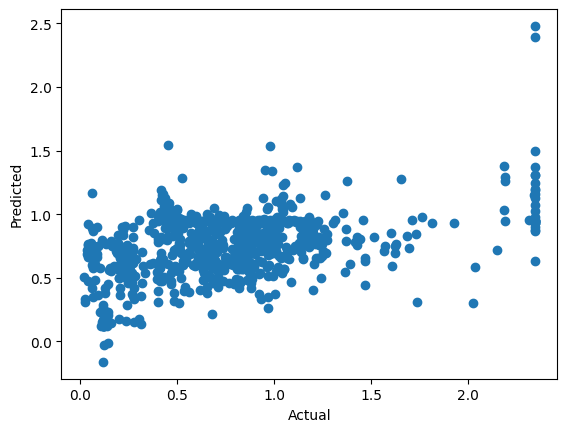

In [100]:
plt.scatter(actual_list, pred_list)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [ ]:
plt.bar(fs_methods, r2_scores, color ='blue', 
        width = 0.4)
 
plt.xlabel("feature Selection Method")
plt.ylabel("R-Squared Score")
plt.title("R-squared Scores of Feature Selection Datasets")
plt.show()

In [213]:
metrics_df = pd.DataFrame({'R2' : r2_all, 'MAE': mae_all,'RMSE':rmse_all, "Execution Time": exec_time})

In [215]:
index_labels=['Original-Hybrid','RF-Hybrid','Original-Traditional', 'RF-Traditional']
metrics_df.index = index_labels

In [217]:
metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Original-Hybrid to RF-Traditional
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   R2              4 non-null      object 
 1   MAE             4 non-null      object 
 2   RMSE            4 non-null      object 
 3   Execution Time  4 non-null      float64
dtypes: float64(1), object(3)
memory usage: 160.0+ bytes


In [219]:
metrics_df = metrics_df.astype(float)

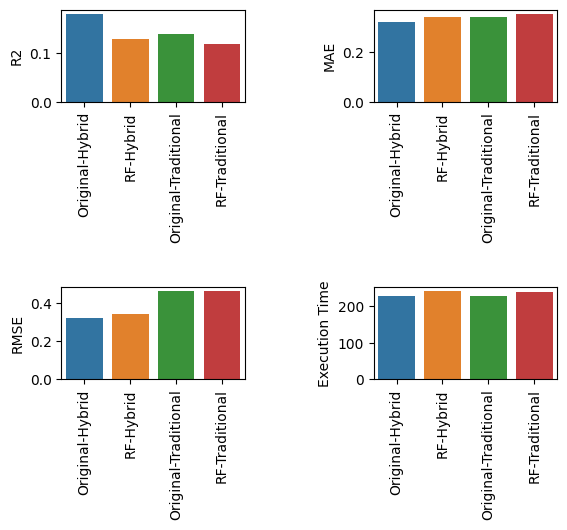

In [233]:
fig = plt.figure()
fig.subplots_adjust(hspace=2, wspace=0.7)
ax = fig.add_subplot(2, 2, 1)
sns.barplot(x=metrics_df.index,y=metrics_df.R2,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax = fig.add_subplot(2, 2, 2)
sns.barplot(x=metrics_df.index, y=metrics_df.MAE,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax = fig.add_subplot(2, 2, 3)
sns.barplot(x=metrics_df.index,y=metrics_df.RMSE,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax = fig.add_subplot(2, 2, 4)
sns.barplot(x=metrics_df.index,y=metrics_df['Execution Time'],ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

## Model Saving

Save the model that has the highest R2 value 

### Saving the model

In [21]:
import pickle

In [22]:
filename = 'trained_hybrid_model.sav' #filename of the saved model

In [23]:
pickle.dump(ann_model, open(filename, 'wb')) #saved ann_model to the filename 

In [24]:
#loading the saved model
loaded_model = pickle.load(open('trained_hybrid_model.sav', 'rb'))

### Attempt 1

This is the first entry in the dataset. 

In [25]:
input_data = (1.00, 25.15,28.36,20.88,1701.00,975.30,100.00,0.16,0.75,6.00,4.10,9.40,26.01,0.28,140.02, 70.89)

In [26]:
input_data_as_numpy_array = np.asarray(input_data)

In [27]:
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [28]:
prediction = loaded_model.predict(input_data_reshaped)
print(f"Predicted output: {prediction}")

1/1 [==============================] - 0s 130ms/step
Predicted output: [[0.12799504]]


In [122]:
print(f"Actual output: {y.iloc[0]}")

Actual output: 1.1334


### Attempt 2 

The input data is based from the dataset but the values are rounded to the nearest whole number

In [116]:
input_data_2 = (1, 25,28,21,1701,975,100,0.16,0.75,6.00,4,9,26,0.28,140, 71)

In [117]:
input_data_as_numpy_array_2 = np.asarray(input_data_2)

In [118]:
input_data_reshaped_2 = input_data_as_numpy_array_2.reshape(1,-1)

In [120]:
prediction = loaded_model.predict(input_data_reshaped_2)
print(f"Predicted output: {prediction}")

1/1 [==============================] - 0s 50ms/step
Predicted output: [[0.1334619]]


In [121]:
print(f"Actual output: {y.iloc[0]}")

Actual output: 1.1334


### Use saved model

In [53]:
pickled_model = pickle.load(open('trained_hybrid_model.sav', 'rb'))

ModuleNotFoundError: No module named 'keras.src'

# Dont mind this section (wala pa nahuman)

### Leave one out

This is working pero dugay siya because k = number of data points. 
* R2 is not showing (Error: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.)

In [65]:
import time
from sklearn.model_selection import LeaveOneOut

In [68]:
start_time = time.time()

#initializing KFold object
loo = LeaveOneOut()
mae_scores = []
r2_scores = []

for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  # Predictors for train & test
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]  # Target for train, test

    # scaling fetaure sets 
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    mlr_model = MLR_Model(X_train,y_train) #perform MLR
    ann_model = ANN_Model(mlr_model.coef_,mlr_model.intercept_) #Intercept and coeff of MLR will be initailzied as ANN weights
    ann_model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=0) #fit ann model to data
    y_pred = ann_model.predict(X_test) #use ann model to predict test set
    print(f"MAE: { mean_absolute_error(y_test, y_pred)}")  #measure mean absolute value
    print(f"R2: {r2_score(y_test,y_pred)}")#measure R-squared value
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
    print(f"Intercept: {mlr_model.intercept_}")
    print(f"Coefficients: {list(zip(mlr_model.coef_))}")

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

1/1 [==============================] - 0s 89ms/step
MAE: 0.1897932657241821
R2: nan
RMSE: 0.1897932657241821
Intercept: 0.7870085949035477
Coefficients: [(0.05132091500095425,), (-0.2669382047324648,), (-0.5922470067350075,), (0.26248723596115053,), (-0.21303378314670382,), (-0.16216237421957952,), (-0.05836887977094923,), (0.11550343385336188,), (-0.5872222794647664,), (-0.03968618408762144,), (0.03321198908115678,), (0.044475828372272326,), (0.20906991531596894,), (-0.007694453003741271,), (-0.06917070404647602,), (0.1610333627880207,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 104ms/step
MAE: 1.318401616448784
R2: nan
RMSE: 1.318401616448784
Intercept: 0.787005538386169
Coefficients: [(0.051170082446475924,), (-0.25671789576490134,), (-0.592782069124299,), (0.2552215744379957,), (-0.2130908595666721,), (-0.1622081360112782,), (-0.058302166811070755,), (0.11620431138894044,), (-0.590291187878203,), (-0.039519107708693504,), (0.03326814787228202,), (0.04446726457735031,), (0.2071771166546249,), (-0.00816981883270756,), (-0.06974064016790059,), (0.16139771578721532,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 88ms/step
MAE: 0.36607593165325936
R2: nan
RMSE: 0.36607593165325936
Intercept: 0.7870520380546138
Coefficients: [(0.051586643658591516,), (-0.3348994612032508,), (-0.6027896373998187,), (0.32527970863649414,), (-0.21360603569079684,), (-0.16451642474973843,), (-0.05828022438266153,), (0.11533928430588489,), (-0.576507460793761,), (-0.03991720075036912,), (0.03240476565686133,), (0.04456180617946013,), (0.2092894107099519,), (-0.006957808547095334,), (-0.06956817384942085,), (0.1604094271371959,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 96ms/step
MAE: 0.43402055216949464
R2: nan
RMSE: 0.43402055216949464
Intercept: 0.7869994420893736
Coefficients: [(0.05149261895002705,), (-0.2741585647584869,), (-0.5938214334964328,), (0.267553467697237,), (-0.21292811451623644,), (-0.1619575465904375,), (-0.05834399878301341,), (0.11689290516696747,), (-0.5875518148169754,), (-0.03984499050400646,), (0.032956497282375485,), (0.04474916062462784,), (0.21061248769792223,), (-0.007010671987771906,), (-0.06995806742537461,), (0.16059786064194143,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 88ms/step
MAE: 1.867595979528534
R2: nan
RMSE: 1.867595979528534
Intercept: 0.7869935367992703
Coefficients: [(0.05137406954137275,), (-0.2738790787932746,), (-0.5928573429705928,), (0.2671779780861112,), (-0.2126615950812746,), (-0.16188153399569052,), (-0.05837236486671862,), (0.11654600827054494,), (-0.5861318510318007,), (-0.03964730933226292,), (0.03329208363883694,), (0.04458150562811695,), (0.20998950819866355,), (-0.007404993919759607,), (-0.06969360223442511,), (0.16089933393433895,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 96ms/step
MAE: 1.6437879499570618
R2: nan
RMSE: 1.6437879499570618
Intercept: 0.7869804465399113
Coefficients: [(0.051528502863925164,), (-0.2827167998957415,), (-0.5924792881101607,), (0.27470952872857096,), (-0.21270381233129884,), (-0.16128362886561984,), (-0.05840112276107543,), (0.11592112217122451,), (-0.5826244372811241,), (-0.039977198832375785,), (0.033267117151019786,), (0.04470080362479075,), (0.20895589061738484,), (-0.0069928175528159485,), (-0.06798014076531733,), (0.16175052732451384,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 91ms/step
MAE: 0.9347163764203643
R2: nan
RMSE: 0.9347163764203643
Intercept: 0.7869543293821571
Coefficients: [(0.04904314478942195,), (-0.27062507546909487,), (-0.5939623798357089,), (0.2604511459347265,), (-0.21165287902310584,), (-0.15997788997552734,), (-0.058219836416234336,), (0.11833574438328782,), (-0.588821808514733,), (-0.03984333001305264,), (0.03384916993526774,), (0.04463201900907191,), (0.21134295170339754,), (-0.007139124441851193,), (-0.06947361635001129,), (0.16198744255183675,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 96ms/step
MAE: 1.4518442205748139
R2: nan
RMSE: 1.4518442205748139
Intercept: 0.7869181894810862
Coefficients: [(0.05142673274924675,), (-0.2806552171374399,), (-0.5923450531762542,), (0.26955518396847666,), (-0.21178857108945173,), (-0.16066803115238654,), (-0.058378926983140254,), (0.1182160961405144,), (-0.584682848934992,), (-0.03967363223775776,), (0.033751898854568876,), (0.0449931936868779,), (0.21212222775634407,), (-0.006739822961737412,), (-0.06957740518960027,), (0.16205660910212227,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 88ms/step
MAE: 0.4416804260165099
R2: nan
RMSE: 0.4416804260165099
Intercept: 0.7868788315840269
Coefficients: [(0.05185916476759301,), (-0.4459098246565747,), (-0.6229235836429181,), (0.42868475511690624,), (-0.21459935139109287,), (-0.16594772557049894,), (-0.05825206080617422,), (0.1136796757211466,), (-0.5634314047666668,), (-0.04107403631940598,), (0.029973381170399428,), (0.04545998184187767,), (0.20788553485107733,), (-0.005021162626625771,), (-0.06637015842511707,), (0.16232278838334596,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 128ms/step
MAE: 0.3369773888892822
R2: nan
RMSE: 0.3369773888892822
Intercept: 0.7869957354543492
Coefficients: [(0.05169556599509925,), (-0.2864464368277125,), (-0.5917014832736507,), (0.27562300973572296,), (-0.21238796274858907,), (-0.16143485958562637,), (-0.05829965987433165,), (0.11537288451439927,), (-0.5793942492535098,), (-0.040013876919640555,), (0.033793760452170626,), (0.04421972609701852,), (0.2101905405694926,), (-0.007430794126799195,), (-0.06704241184952864,), (0.16189009616081287,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 88ms/step
MAE: 0.5707373803330993
R2: nan
RMSE: 0.5707373803330993
Intercept: 0.7868572729984663
Coefficients: [(0.05167017531533317,), (-0.2824279323485977,), (-0.5918061815749748,), (0.27010075837107284,), (-0.21204497877290818,), (-0.1610746505480648,), (-0.058222106178567386,), (0.11757911696353891,), (-0.5826734308039475,), (-0.04009327352490878,), (0.03370195360445162,), (0.04451034599397072,), (0.2126421926366101,), (-0.007063387530386916,), (-0.06895866538191768,), (0.16111352212073782,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 104ms/step
MAE: 1.0651621231738893
R2: nan
RMSE: 1.0651621231738893
Intercept: 0.7868423422177174
Coefficients: [(0.05147875518642051,), (-0.2817102477077967,), (-0.5891975399379226,), (0.27020874246153037,), (-0.21245353880131024,), (-0.16135666211944297,), (-0.058448807757789184,), (0.11297127063462732,), (-0.578272030721076,), (-0.0397079120316826,), (0.033918351196036374,), (0.04433457668816115,), (0.21163762643391465,), (-0.007546281212937904,), (-0.06579673963165646,), (0.16209569449865946,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 128ms/step
MAE: 0.48623969450750737
R2: nan
RMSE: 0.48623969450750737
Intercept: 0.7868192276187881
Coefficients: [(0.05136721078645541,), (-0.2845161500164467,), (-0.5896237054053253,), (0.27088457712176633,), (-0.21158830575427592,), (-0.16070175038492793,), (-0.058438558317254787,), (0.11557887374466112,), (-0.5794733985479735,), (-0.03966100702045569,), (0.03402274417313541,), (0.044628956953608204,), (0.2131568844483909,), (-0.0070863846631092995,), (-0.0676299694834695,), (0.16207228306222726,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 96ms/step
MAE: 1.639612411301361
R2: nan
RMSE: 1.639612411301361
Intercept: 0.7868880229971305
Coefficients: [(0.05159235941341609,), (-0.27848433360165303,), (-0.5934975273100705,), (0.26967335077934973,), (-0.21226733337948947,), (-0.16109009156951096,), (-0.05828712704858105,), (0.11818676729001264,), (-0.585586057813587,), (-0.03963812521684712,), (0.033135136487208894,), (0.04483593524546516,), (0.21047023117683672,), (-0.0065087062853752455,), (-0.06964514164872634,), (0.16090960608285054,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 88ms/step
MAE: 0.38140918431048587
R2: nan
RMSE: 0.38140918431048587
Intercept: 0.7868504250813549
Coefficients: [(0.05130738751271456,), (-0.27550138360925913,), (-0.5926528275254717,), (0.26672422952509733,), (-0.2118760090592646,), (-0.1611342987381613,), (-0.058393421220573845,), (0.11760799110833664,), (-0.5858563866917361,), (-0.03965933686279388,), (0.03338668250422181,), (0.04476393088629234,), (0.21113836126062502,), (-0.007045141464115072,), (-0.07015064374004258,), (0.16089336925369757,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 78ms/step
MAE: 0.8138308078945007
R2: nan
RMSE: 0.8138308078945007
Intercept: 0.7869691701254728
Coefficients: [(0.051562064777678746,), (-0.27692665064890376,), (-0.5920495679677187,), (0.26986747107980713,), (-0.2129595014808282,), (-0.1614126241962724,), (-0.05839509824869788,), (0.11600415637273753,), (-0.584180979034643,), (-0.03965969912114798,), (0.033159954903483946,), (0.04480261575368319,), (0.20921297733404087,), (-0.006747615551504134,), (-0.06829126314462465,), (0.1614840715962692,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 88ms/step
MAE: 2.1554673059241334
R2: nan
RMSE: 2.1554673059241334
Intercept: 0.7868796561949926
Coefficients: [(0.05135625526900482,), (-0.27914950702187935,), (-0.590726137351682,), (0.2686013210834156,), (-0.2120520609776571,), (-0.16081762485509585,), (-0.05841151661671167,), (0.1160524284789741,), (-0.5825945180148522,), (-0.040045516068423395,), (0.0334793302320263,), (0.04474472549589263,), (0.21148175752812998,), (-0.007235170499356815,), (-0.06830783312245095,), (0.16156388932931115,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 110ms/step
MAE: 0.5474776378350525
R2: nan
RMSE: 0.5474776378350525
Intercept: 0.7866943956348278
Coefficients: [(0.051711161946717335,), (-0.2750078156616733,), (-0.590049170505463,), (0.2654004648125847,), (-0.2128203102047275,), (-0.1603753908668127,), (-0.058401782839342685,), (0.11408911903450927,), (-0.5829079104826519,), (-0.040310961683985166,), (0.03291351263717032,), (0.04477989631795222,), (0.2112481808084284,), (-0.006113043596297549,), (-0.0655057822787993,), (0.1622077708598963,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 88ms/step
MAE: 1.7757959789554596
R2: nan
RMSE: 1.7757959789554596
Intercept: 0.7864223250840269
Coefficients: [(0.05189965840865785,), (-0.29203119579163883,), (-0.5856894278606862,), (0.27489148010008435,), (-0.21264123419498615,), (-0.16095772537383723,), (-0.058435715943204534,), (0.11036941257702129,), (-0.5724979539418293,), (-0.04043153685072591,), (0.03394489956856768,), (0.04415395437666117,), (0.21550026769892378,), (-0.0067473101612114126,), (-0.06256254030617761,), (0.16263996920496682,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 92ms/step
MAE: 0.16254751682281499
R2: nan
RMSE: 0.16254751682281499
Intercept: 0.7875880066682527
Coefficients: [(0.051298686356849976,), (-0.26484181513030214,), (-0.5940942146172259,), (0.26099514038345273,), (-0.21318206973318304,), (-0.16222431901952084,), (-0.058350988669780564,), (0.1156455054139134,), (-0.589053294693356,), (-0.03967580346571373,), (0.033237719686417734,), (0.04443121737627682,), (0.2088751528894024,), (-0.0077831866570318535,), (-0.06936306375183604,), (0.16099516956904084,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 88ms/step
MAE: 0.24285434133166506
R2: nan
RMSE: 0.24285434133166506
Intercept: 0.787753069057291
Coefficients: [(0.051297810325937075,), (-0.26292568890350054,), (-0.593625683651072,), (0.2608927633364226,), (-0.21361801166106992,), (-0.16315714659156705,), (-0.05836790213484078,), (0.11451278125067951,), (-0.5882068571946093,), (-0.039360399342602645,), (0.033120006521602165,), (0.04448163334589486,), (0.20806594926263813,), (-0.008163107937565693,), (-0.06928992358201735,), (0.1605475355841775,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 98ms/step
MAE: 0.6408348119890137
R2: nan
RMSE: 0.6408348119890137
Intercept: 0.788098077969054
Coefficients: [(0.05062634935369313,), (-0.2514311028679222,), (-0.6020256707984674,), (0.2545861060595036,), (-0.2131028284475031,), (-0.16318470813111963,), (-0.058340985939185006,), (0.1196629548591836,), (-0.6021287985490125,), (-0.039269341987654374,), (0.033641553563678935,), (0.04349201964226633,), (0.20688497514608722,), (-0.008761796323670634,), (-0.07491334154794584,), (0.1596189041056265,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 89ms/step
MAE: 0.43110662361468505
R2: nan
RMSE: 0.43110662361468505
Intercept: 0.7882513992043493
Coefficients: [(0.05103974431351652,), (-0.23347069084409397,), (-0.6047665111300247,), (0.24495688394533047,), (-0.21465235866611343,), (-0.1649017313308391,), (-0.05814614425888553,), (0.11944889168990358,), (-0.6090377082698096,), (-0.038921593983856945,), (0.03268935830440317,), (0.04337441723407662,), (0.2035601991319249,), (-0.0084162899102164,), (-0.0753601050544158,), (0.15870025316033237,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 80ms/step
MAE: 0.1691420822674942
R2: nan
RMSE: 0.1691420822674942
Intercept: 0.7883076459129044
Coefficients: [(0.05091785066940651,), (-0.2414700585949646,), (-0.5962728106833665,), (0.2469827313763515,), (-0.2144234769944362,), (-0.1638087673244899,), (-0.05856490480379028,), (0.11221236777200425,), (-0.5957367043382541,), (-0.03900562782509902,), (0.03273220172022948,), (0.044915911467232186,), (0.20520613724937667,), (-0.008624250779061652,), (-0.06925912151394194,), (0.16066642138656564,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 100ms/step
MAE: 0.4773214196498108
R2: nan
RMSE: 0.4773214196498108
Intercept: 0.7882854797230652
Coefficients: [(0.050776361589604954,), (-0.26088397782226247,), (-0.5984853935112986,), (0.26094474882249064,), (-0.21279016701385636,), (-0.16314342727504563,), (-0.05843519221455796,), (0.11764342148749485,), (-0.5945489726513153,), (-0.039587362207765,), (0.03371326081298213,), (0.04374641269953795,), (0.20712497367373334,), (-0.008884846476193328,), (-0.0732558565747734,), (0.15947565457144997,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 88ms/step
MAE: 0.3032623504603348
R2: nan
RMSE: 0.3032623504603348
Intercept: 0.78825184945435
Coefficients: [(0.051199753180373335,), (-0.24304663389835923,), (-0.5977787369348352,), (0.2476099056495492,), (-0.21437313153628113,), (-0.16406097735328734,), (-0.05825668392176589,), (0.11543596230912113,), (-0.5989566901898512,), (-0.03965373341327004,), (0.03258498474162535,), (0.04370171497385202,), (0.2070067861426104,), (-0.008419607763832765,), (-0.07144399552778045,), (0.1587105934603251,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 80ms/step
MAE: 0.7520385906376343
R2: nan
RMSE: 0.7520385906376343
Intercept: 0.7882340546655774
Coefficients: [(0.05103529627137607,), (-0.2529961214895716,), (-0.5919776358451805,), (0.2519847546851217,), (-0.21252708286383787,), (-0.16462444976894025,), (-0.05821546266365724,), (0.1179166783361006,), (-0.5871154952483583,), (-0.03801993905923654,), (0.0344723156559181,), (0.04410490427077103,), (0.2073376010829215,), (-0.009415058701959817,), (-0.07334968708576996,), (0.16024049586195432,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 100ms/step
MAE: 0.6816023756105651
R2: nan
RMSE: 0.6816023756105651
Intercept: 0.7882499344102304
Coefficients: [(0.050941496789788654,), (-0.2623364276269736,), (-0.6031892521157112,), (0.2663090345069237,), (-0.2144952541872183,), (-0.16510042325501761,), (-0.05838972742873305,), (0.11768826364727968,), (-0.5989856221815517,), (-0.03887765644619248,), (0.03307429130076839,), (0.0438174291552814,), (0.20676470594810364,), (-0.008837288715417375,), (-0.07481584075827921,), (0.1590012689271241,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 96ms/step
MAE: 1.0870134552734985
R2: nan
RMSE: 1.0870134552734985
Intercept: 0.7882619338888414
Coefficients: [(0.05115799944958337,), (-0.2488118736380754,), (-0.5974620347628805,), (0.25578933174679436,), (-0.21474046043978484,), (-0.164978945752484,), (-0.05829275779051085,), (0.11234013496712511,), (-0.5935223820432635,), (-0.03953000633737168,), (0.03347586605803522,), (0.04318944683671143,), (0.20288332346065507,), (-0.009331178684483772,), (-0.06847305786080052,), (0.16104866915302166,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 144ms/step
MAE: 0.14253687140481566
R2: nan
RMSE: 0.14253687140481566
Intercept: 0.7882291309677157
Coefficients: [(0.05100625041791113,), (-0.24016704107702805,), (-0.5933285813152555,), (0.24428935955463993,), (-0.2134772732165228,), (-0.16503640751638304,), (-0.05807243580849975,), (0.11705455311938268,), (-0.5922511892580044,), (-0.03822446660542986,), (0.03464410322162454,), (0.04313013057652737,), (0.2045952526854908,), (-0.010123788549908662,), (-0.07264183644001601,), (0.16048296770482756,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 376ms/step
MAE: 0.33664619086961367
R2: nan
RMSE: 0.33664619086961367
Intercept: 0.7881147124222654
Coefficients: [(0.05097644434475537,), (-0.25386434088414395,), (-0.5927095857773265,), (0.2528317202863307,), (-0.21371291730539949,), (-0.1655532946922871,), (-0.05832508210817328,), (0.11345874441947579,), (-0.588519920881769,), (-0.038529303817133834,), (0.0346171418817277,), (0.04312249213891463,), (0.21008547254947801,), (-0.01001979008347872,), (-0.07126481805519402,), (0.16010626827010474,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 117ms/step
MAE: 0.3210859100671387
R2: nan
RMSE: 0.3210859100671387
Intercept: 0.7882126616615679
Coefficients: [(0.05117177269452857,), (-0.2588052840504027,), (-0.5976272439941178,), (0.2593585438880447,), (-0.21359000032919,), (-0.16332289726862537,), (-0.05845159551636486,), (0.11426052689806619,), (-0.5932172288571782,), (-0.039362907820047394,), (0.032431654132549906,), (0.04446413016035179,), (0.20795837724808924,), (-0.007859704839913387,), (-0.06978150687828406,), (0.1602806909330567,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 112ms/step
MAE: 0.4865101624787598
R2: nan
RMSE: 0.4865101624787598
Intercept: 0.7871160230746707
Coefficients: [(0.05096345192450539,), (-0.2646663115358607,), (-0.5949643502312425,), (0.25990150699634734,), (-0.21264395251174104,), (-0.16276128191042422,), (-0.058255671179714995,), (0.1180633592797751,), (-0.5927828650426622,), (-0.04013996552175082,), (0.034211266796123595,), (0.04403201909516617,), (0.2112298880152887,), (-0.008698519891478775,), (-0.07162734933130763,), (0.16091919044945183,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 104ms/step
MAE: 0.04066750741979985
R2: nan
RMSE: 0.04066750741979985
Intercept: 0.7873437652925853
Coefficients: [(0.051299800315611314,), (-0.2639839628385106,), (-0.593115301512433,), (0.2604330628650898,), (-0.21301104767395657,), (-0.16224852567197584,), (-0.058340999211625166,), (0.11598258075564127,), (-0.588479618267655,), (-0.039724117724159166,), (0.033112014216063884,), (0.04446514830174048,), (0.20925252208149853,), (-0.007817665950143491,), (-0.06979224881753189,), (0.16078340839654492,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 88ms/step
MAE: 0.2981113035375671
R2: nan
RMSE: 0.2981113035375671
Intercept: 0.7874251846655766
Coefficients: [(0.05121835443344562,), (-0.21338782362131412,), (-0.5848050465109289,), (0.21447466397007303,), (-0.2126517147289579,), (-0.1603994419035032,), (-0.058376679441382494,), (0.1150726180064626,), (-0.5946240224568936,), (-0.039550902495433915,), (0.0333182616159637,), (0.04459778938651974,), (0.20884459373981937,), (-0.007592921010770996,), (-0.06872245999436262,), (0.16126527342339397,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 91ms/step
MAE: 0.5378468000184327
R2: nan
RMSE: 0.5378468000184327
Intercept: 0.7870975231749378
Coefficients: [(0.05122256058460132,), (-0.2520132507680209,), (-0.5956597453172915,), (0.2494791328367782,), (-0.21346827149445102,), (-0.16325422730641034,), (-0.058224539901297265,), (0.1160577477738856,), (-0.5968939710297504,), (-0.04019067613414386,), (0.03347227482231876,), (0.0435595781258031,), (0.2125245165866707,), (-0.00829946913999638,), (-0.07031346545385093,), (0.16068964039512962,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 88ms/step
MAE: 0.6780309656231766
R2: nan
RMSE: 0.6780309656231766
Intercept: 0.7873173737297483
Coefficients: [(0.05129293598134168,), (-0.2562585998678455,), (-0.594908281447516,), (0.25388664170223485,), (-0.21346998114635596,), (-0.16254398120337527,), (-0.058311681197837355,), (0.11548474411432158,), (-0.5937305757195925,), (-0.040133670944805494,), (0.032421655213046685,), (0.044618649709456885,), (0.21072800916304116,), (-0.008035148216110795,), (-0.06943135487970814,), (0.1609082256626206,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 88ms/step
MAE: 0.5044723316944733
R2: nan
RMSE: 0.5044723316944733
Intercept: 0.7873433232605002
Coefficients: [(0.051240270315223525,), (-0.25218102170715484,), (-0.5942296474214429,), (0.2507593193125697,), (-0.2138820850950623,), (-0.16270116363840242,), (-0.05828751757302186,), (0.11334510967652509,), (-0.5936296198109694,), (-0.040721796388965004,), (0.03332176303628867,), (0.04410322182020345,), (0.2095758610829975,), (-0.00858332631963755,), (-0.06693332448535261,), (0.16242814278915713,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 97ms/step
MAE: 0.289324989173645
R2: nan
RMSE: 0.289324989173645
Intercept: 0.7874936937417804
Coefficients: [(0.04914294830697971,), (-0.25817417036197615,), (-0.5946852781770408,), (0.25317798860603935,), (-0.21304058642207233,), (-0.16179717578964034,), (-0.05821534211052988,), (0.11458974806568786,), (-0.5921846012349438,), (-0.04056970577507785,), (0.03356889774116249,), (0.04442619095146565,), (0.21004631690734543,), (-0.008769257155930455,), (-0.06749556185631922,), (0.16268331695015448,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 88ms/step
MAE: 0.792435919736679
R2: nan
RMSE: 0.792435919736679
Intercept: 0.7873399139770773
Coefficients: [(0.05108796721587864,), (-0.2680124269018766,), (-0.5941012079664404,), (0.26163538403772685,), (-0.21261407198120974,), (-0.16233177816134467,), (-0.05834944621151642,), (0.11513590958295164,), (-0.5889038999841847,), (-0.04011802444702496,), (0.033756485430110506,), (0.04443408863174415,), (0.21132810515731132,), (-0.00833130176203097,), (-0.0682015450532325,), (0.1624343688497555,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 88ms/step
MAE: 1.169556183280945
R2: nan
RMSE: 1.169556183280945
Intercept: 0.787893568165577
Coefficients: [(0.05133414473787126,), (-0.25247018882085676,), (-0.5897042811490514,), (0.2496583820892717,), (-0.21294355671379503,), (-0.16182531802931904,), (-0.058348324584266906,), (0.11547765926564406,), (-0.587785351384337,), (-0.039460898859968535,), (0.03320838533271794,), (0.04449413239031411,), (0.20927575834996676,), (-0.007542121635547024,), (-0.0694067950204657,), (0.16017679820539593,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 96ms/step
MAE: 0.62278315908432
R2: nan
RMSE: 0.62278315908432
Intercept: 0.7878990761869681
Coefficients: [(0.05131025118270821,), (-0.2649613773046352,), (-0.5949068476138304,), (0.2610713048671664,), (-0.21320119320553083,), (-0.16218362458268631,), (-0.058345976452973076,), (0.11554998735819938,), (-0.5893187687490353,), (-0.03970543932984265,), (0.033274080368848734,), (0.0444143839714932,), (0.2089041663839428,), (-0.007847645772641328,), (-0.06915977187591592,), (0.16108875577432646,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 88ms/step
MAE: 0.40047127832643126
R2: nan
RMSE: 0.40047127832643126
Intercept: 0.7881710695479316
Coefficients: [(0.05113821967523596,), (-0.264025571953291,), (-0.5949106248669481,), (0.2611653605400977,), (-0.21279786903053158,), (-0.16146943592775892,), (-0.05844511090339089,), (0.11688057621244546,), (-0.5890572890792795,), (-0.039345115360128385,), (0.03367996178982921,), (0.04448212466223856,), (0.20703342772921735,), (-0.007556402453317897,), (-0.07075704656739319,), (0.16048541112870376,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 88ms/step
MAE: 0.10750489673015595
R2: nan
RMSE: 0.10750489673015595
Intercept: 0.788179302998467
Coefficients: [(0.05134490624286659,), (-0.26121606644211454,), (-0.5962137153630765,), (0.26052883030595825,), (-0.2134574687272765,), (-0.16183708613047781,), (-0.05843354373339663,), (0.11569938767311597,), (-0.5909061983285394,), (-0.03944474561295165,), (0.032692548604012175,), (0.04466227167939745,), (0.20677526038968186,), (-0.007178037677981906,), (-0.06984707663880306,), (0.16040350886595714,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 104ms/step
MAE: 0.03951896013850403
R2: nan
RMSE: 0.03951896013850403
Intercept: 0.7881821956161115
Coefficients: [(0.051480816949812616,), (-0.2699197201256268,), (-0.5966205472035179,), (0.2684958403869571,), (-0.21333189168106037,), (-0.16205731371189974,), (-0.05834151947624645,), (0.11770639009985007,), (-0.5888064222608523,), (-0.03930040293468086,), (0.032761290734079455,), (0.04456061185644839,), (0.20594203645252973,), (-0.007177905073928287,), (-0.07139536709596533,), (0.15950566027453528,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 121ms/step
MAE: 0.3742004826587829
R2: nan
RMSE: 0.3742004826587829
Intercept: 0.7882199706936538
Coefficients: [(0.05125166834470327,), (-0.2636602355204014,), (-0.5945081277262046,), (0.26138403159674445,), (-0.21319269925367634,), (-0.161724898712875,), (-0.05847220103116616,), (0.11549550898227712,), (-0.5877284088779968,), (-0.03917176437817984,), (0.033612195642606174,), (0.044230017694001186,), (0.20697020192129587,), (-0.007365782607477634,), (-0.07001940469122078,), (0.1605411823595847,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 87ms/step
MAE: 0.19558535338430785
R2: nan
RMSE: 0.19558535338430785
Intercept: 0.7882300014824236
Coefficients: [(0.05156209846571901,), (-0.2710244687068533,), (-0.5944994405993909,), (0.2694705551362898,), (-0.21335669285496858,), (-0.16198561469236553,), (-0.058369237655249914,), (0.11591295968871433,), (-0.584829684484508,), (-0.0391988307436813,), (0.03317661595951254,), (0.04414383915179838,), (0.20488951200174366,), (-0.0072859383278471275,), (-0.069480495224041,), (0.16031142005976828,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 88ms/step
MAE: 0.23897358711242675
R2: nan
RMSE: 0.23897358711242675
Intercept: 0.7881968569356329
Coefficients: [(0.051223370895072826,), (-0.27621513206413384,), (-0.5938586975092076,), (0.2701963416940018,), (-0.2122922820021334,), (-0.16168503874679016,), (-0.05837818117841458,), (0.11736032788277317,), (-0.5838161455995636,), (-0.03921884900876614,), (0.03395492531315953,), (0.04418919109758595,), (0.20809563206750442,), (-0.007523048697577844,), (-0.07091618115342245,), (0.1601510088231417,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 88ms/step
MAE: 0.05030273135071564
R2: nan
RMSE: 0.05030273135071564
Intercept: 0.7882095931214634
Coefficients: [(0.05150012834807214,), (-0.2645657255652455,), (-0.5974271709176284,), (0.2649498234227289,), (-0.21334463535165868,), (-0.1620092115527933,), (-0.05832491981626449,), (0.11836957708380101,), (-0.5910821844694171,), (-0.03921974523385162,), (0.03271133453048582,), (0.04448662219262811,), (0.20517508621216457,), (-0.006990967860936257,), (-0.07197513761348812,), (0.15946708376191826,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 89ms/step
MAE: 0.04052703973851013
R2: nan
RMSE: 0.04052703973851013
Intercept: 0.788199764023869
Coefficients: [(0.051376218528753154,), (-0.26966207375851553,), (-0.593434595583381,), (0.26645646292051506,), (-0.21329146559939965,), (-0.1619822363583557,), (-0.0584870725478899,), (0.11381965396699378,), (-0.5843990936072386,), (-0.039401039979350454,), (0.03306338353164319,), (0.04453079616549451,), (0.20712344944507638,), (-0.007538759582984125,), (-0.06818323746327368,), (0.16089307429256502,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 112ms/step
MAE: 0.3259658050897522
R2: nan
RMSE: 0.3259658050897522
Intercept: 0.7881890045185187
Coefficients: [(0.05131469668605469,), (-0.2637408960671286,), (-0.5945956938949837,), (0.2612524411059193,), (-0.21315199261671533,), (-0.1615391924938156,), (-0.058470296584557366,), (0.11518435536163091,), (-0.5881579348070278,), (-0.0392241223254408,), (0.032833566391763644,), (0.04490809952971423,), (0.20723751435533175,), (-0.007105091817278851,), (-0.06901913490253259,), (0.16086482401747082,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 128ms/step
MAE: 0.04485620589750672
R2: nan
RMSE: 0.04485620589750672
Intercept: 0.7882034760987346
Coefficients: [(0.051291698185114004,), (-0.27055659170695195,), (-0.5934990117361086,), (0.26599222290617675,), (-0.21293861591729663,), (-0.16198018957281932,), (-0.0584509068458447,), (0.11534203041122698,), (-0.585093584515265,), (-0.03945634145027592,), (0.03332589405243777,), (0.044555634601520726,), (0.20819592821753125,), (-0.007758296843711069,), (-0.069412550318056,), (0.16069009244498653,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 88ms/step
MAE: 0.32916991756939695
R2: nan
RMSE: 0.32916991756939695
Intercept: 0.7882445314316222
Coefficients: [(0.05145947771488511,), (-0.27107398556584283,), (-0.5947915185494064,), (0.26755475306223864,), (-0.21309602095910918,), (-0.16217064177222917,), (-0.05837751905360827,), (0.11619872900266198,), (-0.5862661753728541,), (-0.039120954480875894,), (0.03298220510393111,), (0.044589402791131834,), (0.2078105411064246,), (-0.00712842418298887,), (-0.07001007738330328,), (0.15993682012599006,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 88ms/step
MAE: 0.057284256703613284
R2: nan
RMSE: 0.057284256703613284
Intercept: 0.788306757473064
Coefficients: [(0.05103534190753268,), (-0.2554469184270484,), (-0.5962617076984632,), (0.2548259413271827,), (-0.2130345989023304,), (-0.16120802582910893,), (-0.05854557080063419,), (0.11511927118891041,), (-0.5932611725321246,), (-0.03954864534826444,), (0.0328229031492326,), (0.04470844160974072,), (0.20755591682073993,), (-0.007295534794219471,), (-0.06976469372228647,), (0.1607648504185652,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 88ms/step
MAE: 0.11523534073355102
R2: nan
RMSE: 0.11523534073355102
Intercept: 0.7883150765559546
Coefficients: [(0.05154184180676096,), (-0.2641810948065487,), (-0.5950776755300922,), (0.2640194711004665,), (-0.2139411407187954,), (-0.16229716394655133,), (-0.05848429442157534,), (0.11328103531822457,), (-0.5872940602506684,), (-0.03926016616458245,), (0.03264224645323923,), (0.04461031553117364,), (0.2060160354908262,), (-0.006878648878381849,), (-0.06806393032585509,), (0.16040712376979385,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 97ms/step
MAE: 0.4716190657866516
R2: nan
RMSE: 0.4716190657866516
Intercept: 0.7884664042337609
Coefficients: [(0.05130264636303791,), (-0.27007095925025243,), (-0.59614121100297,), (0.2674816472930487,), (-0.2129642363803097,), (-0.16160286509049365,), (-0.058491233828897635,), (0.1162047240266168,), (-0.5879200812985559,), (-0.03932260247189128,), (0.03284347073509551,), (0.04457922564826201,), (0.20692606658380047,), (-0.007052426167818949,), (-0.07032473621689642,), (0.16007457142117026,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 97ms/step
MAE: 0.2141917197149582
R2: nan
RMSE: 0.2141917197149582
Intercept: 0.7884903227538138
Coefficients: [(0.051188129307013636,), (-0.26389155260933916,), (-0.5945913842334641,), (0.2601559491372237,), (-0.21260206978951118,), (-0.1618123714112424,), (-0.05842998467096776,), (0.11552026989087603,), (-0.5890240268742244,), (-0.03958868430306913,), (0.03344407605375296,), (0.04439035373917334,), (0.20858963549044277,), (-0.007731941500184355,), (-0.06954832188924823,), (0.16072540710558827,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 139ms/step
MAE: 0.2625192323112488
R2: nan
RMSE: 0.2625192323112488
Intercept: 0.7884884612137073
Coefficients: [(0.051447332202898426,), (-0.2695718650316732,), (-0.5949758902576983,), (0.2665605893033634,), (-0.21298673744943453,), (-0.16188657687936792,), (-0.05838199477223807,), (0.11701608017217091,), (-0.5871914408619118,), (-0.03931304241950852,), (0.032796111442214115,), (0.044533461007893405,), (0.20729863900546838,), (-0.00718526220256838,), (-0.07091223717696893,), (0.15897291578491507,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 152ms/step
MAE: 0.5787098160589295
R2: nan
RMSE: 0.5787098160589295
Intercept: 0.7884963400011422
Coefficients: [(0.051760885542149436,), (-0.30649626923749157,), (-0.5873686826918686,), (0.29412320237930084,), (-0.2123131163539265,), (-0.1618088068858394,), (-0.05863250150863844,), (0.11124689795366144,), (-0.5629352198648916,), (-0.03864919708844224,), (0.03339530646322866,), (0.045077077968673517,), (0.20775602235256474,), (-0.00668290914776836,), (-0.06503835780973904,), (0.1615261965433504,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 199ms/step
MAE: 0.06707055846214295
R2: nan
RMSE: 0.06707055846214295
Intercept: 0.7884398248500699
Coefficients: [(0.05134076994870557,), (-0.26745208905827,), (-0.5962279709289374,), (0.2657453126535144,), (-0.21358427895564622,), (-0.161956964322023,), (-0.05859518826613428,), (0.11338772159547271,), (-0.5885615037577655,), (-0.03946478788814044,), (0.03213381522840067,), (0.044947710496740755,), (0.20774583701277577,), (-0.007068826703661241,), (-0.06857974418286353,), (0.16060578599442743,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 152ms/step
MAE: 0.5454336272966308
R2: nan
RMSE: 0.5454336272966308
Intercept: 0.7884420530145092
Coefficients: [(0.051294315344975944,), (-0.30978898021963563,), (-0.5918877452929596,), (0.2985103179152313,), (-0.2115513370866692,), (-0.16213671936186536,), (-0.05843378419163699,), (0.11675407449434079,), (-0.568423973730296,), (-0.038471749825305254,), (0.03648807020233648,), (0.04308635761066374,), (0.2054504763708667,), (-0.007702069806741833,), (-0.06991225300211801,), (0.16085158864512558,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 96ms/step
MAE: 0.00922188313627624
R2: nan
RMSE: 0.00922188313627624
Intercept: 0.7884362599048812
Coefficients: [(0.051802565362516484,), (-0.2856508549174455,), (-0.5935464932344001,), (0.281006846587866,), (-0.21193410104496677,), (-0.16145600423448309,), (-0.05826650311557936,), (0.12050213686611339,), (-0.5776127734826366,), (-0.038365589672523376,), (0.03318758018578004,), (0.04491228959563393,), (0.20362189340289993,), (-0.006355671391850528,), (-0.0726160186360986,), (0.15954496701946147,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 96ms/step
MAE: 0.1391948365129776
R2: nan
RMSE: 0.1391948365129776
Intercept: 0.7884326542711961
Coefficients: [(0.051673864620846555,), (-0.30477945105994975,), (-0.5936387442657889,), (0.29483846400820923,), (-0.21259171654508613,), (-0.16297491979006573,), (-0.058472103412707505,), (0.11696314350859349,), (-0.5725508444216744,), (-0.03796711592826288,), (0.033593014029397184,), (0.04481248924012972,), (0.2085101798897015,), (-0.006991083753271072,), (-0.07157093954191103,), (0.15952991561414448,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 96ms/step
MAE: 0.14723600110183716
R2: nan
RMSE: 0.14723600110183716
Intercept: 0.7884332706856327
Coefficients: [(0.05126364045405399,), (-0.27026147919066673,), (-0.595677732254866,), (0.26645256395046285,), (-0.21262869563071113,), (-0.1618932776758708,), (-0.0584392919783476,), (0.11625870103817335,), (-0.5877192673098734,), (-0.039441612726036857,), (0.03326730201546764,), (0.044337352865388,), (0.20814106827088188,), (-0.007395254460276757,), (-0.07018841148265073,), (0.16031636812256522,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 120ms/step
MAE: 0.3012989780203247
R2: nan
RMSE: 0.3012989780203247
Intercept: 0.7879477215947229
Coefficients: [(0.051511572555383765,), (-0.27832124002758013,), (-0.5949986830265616,), (0.27205092501245964,), (-0.21300435558474748,), (-0.16226839546405702,), (-0.05804338213070326,), (0.11836803505315623,), (-0.5865879498549157,), (-0.03870109524919117,), (0.032563939794237606,), (0.044620921618762494,), (0.2093734187628974,), (-0.008524240618912693,), (-0.07096508651246854,), (0.15994803392313348,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 96ms/step
MAE: 1.128248279506073
R2: nan
RMSE: 1.128248279506073
Intercept: 0.7879076875038153
Coefficients: [(0.051357494534925385,), (-0.3130493041189633,), (-0.5878127629704614,), (0.29862681074938363,), (-0.21187995578745522,), (-0.16085262172555034,), (-0.05793157734495166,), (0.11514648088936004,), (-0.5644880485502817,), (-0.038209424169383985,), (0.03435971760471247,), (0.044650723282131335,), (0.2056607101440689,), (-0.010612908809148362,), (-0.06462906774833921,), (0.16504277769773482,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 120ms/step
MAE: 0.6983062360794983
R2: nan
RMSE: 0.6983062360794983
Intercept: 0.7879362694075569
Coefficients: [(0.051156762568728274,), (-0.3263816786013119,), (-0.5874432042282083,), (0.30637528983624873,), (-0.21084425672110513,), (-0.15914216143678328,), (-0.057983320543430125,), (0.11640100821302495,), (-0.5604805932153826,), (-0.03797719279674187,), (0.033599318357957514,), (0.0450044948313306,), (0.20765955902701655,), (-0.010422958472455593,), (-0.06434342547284783,), (0.1663611067168275,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 91ms/step
MAE: 0.47428161378741457
R2: nan
RMSE: 0.47428161378741457
Intercept: 0.7879619635225301
Coefficients: [(0.05119473577257906,), (-0.2776041919609707,), (-0.5975944826978705,), (0.2745716611214835,), (-0.21210763487459328,), (-0.15958984951652885,), (-0.05778827373632408,), (0.12194147117889824,), (-0.5898353188683491,), (-0.04037627703696145,), (0.031123135955703554,), (0.045110359722762526,), (0.20352639873736272,), (-0.010143950200196167,), (-0.07069272493011611,), (0.16260706321280177,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 176ms/step
MAE: 0.297938186291626
R2: nan
RMSE: 0.297938186291626
Intercept: 0.7879660515586263
Coefficients: [(0.05137004161058178,), (-0.2907849546668445,), (-0.5910659939290754,), (0.282688727077964,), (-0.21289106113457776,), (-0.16145814978538897,), (-0.05824688842825581,), (0.11367463241711073,), (-0.5756875853036073,), (-0.03883005749548382,), (0.033296542971537856,), (0.04465373506914292,), (0.20636661871309048,), (-0.009235393219510958,), (-0.06568953177140394,), (0.1629512109219434,)]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


KeyboardInterrupt: 

### Tuning (Keras Tuner)

* https://www.tensorflow.org/tutorials/keras/keras_tuner 
* https://www.analyticsvidhya.com/blog/2021/08/hyperparameter-tuning-of-neural-networks-using-keras-tuner/ 


In [170]:
pip install -q -U keras-tuner

^C
Note: you may need to restart the kernel to use updated packages.


In [171]:
import keras_tuner as kt


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [234]:
from sklearn.linear_model import LinearRegression

In [235]:
from sklearn.linear_model import LinearRegression
def MLR_Model(X_train,y_train):
    mlr = LinearRegression()
    mlr.fit(X_train,y_train)
    return mlr

In [236]:
def ANN_Model(initial_weights,bias,hp): 
    model = Sequential()
    model.add(Input(shape = X_train.shape[1])) # number of input features 


    hp_units= hp.Int("units", min_value= 1, max_value= 10,step = 1) # number of units in hidden layer 
    hp_activ = hp.Choice("activation", ['relu','tanh'])
    hp_lr = hp.Choice("learning_rate",values = [1e-2, 1e-3, 1e-4] ) #Choose an optimal value from 0.01, 0.001, or 0.0001



    model.add(Dense(units = hp_units, activation = hp_activ, name = 'hidden')) # one neuron in hidden layer, relu activation
    model.add(Dense(1,activation = hp_activ)) # one neuron in output layer, linear activation


    #initialize weights and bias in hidden layer
    hidden_layer = model.get_layer('hidden')
    #layer.set_weights([weights_array, bias_array])
    hidden_layer.set_weights([np.array([initial_weights]).reshape((16, 1)), np.array([bias])])


    #compile 
    model.compile(loss='mean_absolute_error',optimizer=tf.keras.optimizers.Adam(learning_rate=hp_lr),metrics = [metrics.mean_absolute_error,tf.keras.metrics.RootMeanSquaredError()])
    return model



In [237]:
start_time = time.time()

#initializing KFold object
kfold = KFold(n_splits=10,shuffle=True, random_state=42) #random_state is for reproducability
hp = kt.HyperParameters()

for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  # Predictors for train & test
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]  # Target for train, test

    # scaling fetaure sets 
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    mlr_model = MLR_Model(X_train,y_train) #perform MLR
    #ann_model = ANN_Model(mlr_model.coef_,mlr_model.intercept_,hp) #Intercept and coeff of MLR will be initailzied as ANN weights
    #objective - objective to optimize
    tuner = kt.Hyperband(ANN_Model(mlr_model.coef_,mlr_model.intercept_,hp),objective = 'mean_absolute_error',
                    max_epochs = 500, factor = 3, directory='my_dir',project_name ='khyperband' )
    tuner.search(X_train, y_train, epochs=500, batch_size=32, verbose=0) #fit ann model to data
    print(X_train)
    print(ann_model.get_weights())
    y_pred = ann_model.predict(X_test) #use ann model to predict test set
    print(f"MAE: { mean_absolute_error(y_test, y_pred)}")  #measure mean absolute value
    print(f"R2: {r2_score(y_test,y_pred)}")#measure R-squared value
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
    print(f"Intercept: {mlr_model.intercept_}")
    print(f"Coefficients: {list(zip(mlr_model.coef_))}")

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")


TypeError: Inputs to a layer should be tensors. Got '<keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x000001968B1C8C50>' (of type <class 'keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters'>) as input for layer 'sequential_62'.

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

### Using GridSearch CV (unfinished)

In [245]:
from sklearn.linear_model import LinearRegression
def MLR_Model(X_train,y_train):
    mlr = LinearRegression()
    mlr.fit(X_train,y_train)
    return mlr

In [315]:
def reg_model(initial_weights,bias,unit = 1,activ='relu', lr = 0.01): 
    model = Sequential()
    model.add(Input(shape = X_train.shape[1])) # number of input features 

    model.add(Dense(units = unit, activation = activ, name = 'hidden')) # one neuron in hidden layer, relu activation
    model.add(Dense(1,activation = activ)) # one neuron in output layer, linear activation


    #initialize weights and bias in hidden layer
    hidden_layer = model.get_layer('hidden')
    #layer.set_weights([weights_array, bias_array])
    hidden_layer.set_weights([np.array([initial_weights]).reshape((16, 1)), np.array([bias])])

    model.compile(loss='mean_absolute_error',optimizer=tf.keras.optimizers.Adam(learning_rate=lr),metrics = [metrics.mean_absolute_error,tf.keras.metrics.RootMeanSquaredError()])
    return model


In [247]:
param_grid = {'unit': [1,2,3,4,5], 'activ':['relu','tanh'],'lr':[0.01,0.001,0.0001]}

In [ ]:
pip install scikeras

In [29]:
from scikeras.wrappers import KerasRegressor

In [266]:
scaler = StandardScaler()
features = scaler.fit_transform(X)

In [267]:
target = y

In [292]:

mlr_model = MLR_Model(features,target) #perform MLR

In [316]:
reg = KerasRegressor(build_fn = reg_model ,
                        model__initial_weights = mlr_model.coef_,
                        model__bias = mlr_model.intercept_,
                        loss = 'mean_absolute_error', 
                        optimizer='adam',
                        model__unit =1,
                        model__activ= 'relu',
                        metrics = ['mean_absolute_error',tf.keras.metrics.RootMeanSquaredError(), KerasRegressor.r_squared],
                        model__lr = 0.01, 
                        verbose = False)

In [317]:
param_grid = {'model__activ':['relu','tanh'],'model__lr':[0.01,0.001,0.0001]}

In [318]:
gs = GridSearchCV(reg, param_grid, scoring='r2', cv = 10, n_jobs=-1, verbose=True)

In [319]:
gs.fit(features,target)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


GridSearchCV(cv=10,
             estimator=KerasRegressor(build_fn=<function reg_model at 0x0000019686320FE0>, loss='mean_absolute_error', metrics=['mean_absolute_error', <keras.metrics.regression_metrics.RootMeanSquaredError object at 0x000001968BD26AD0>, <function KerasRegressor.r_squared at 0x00000196E04265C0>], model__activ='relu', model__bias=0.7874710667394572, model__ini...34, -0.26464678, -0.59467154,  0.26084386, -0.21304522,
       -0.162121  , -0.05831255,  0.11567676, -0.58921028, -0.03965003,
        0.03322388,  0.04440803,  0.20873884, -0.00778738, -0.06937733,
        0.16088813]), model__lr=0.01, model__unit=1, optimizer='adam', verbose=False),
             n_jobs=-1,
             param_grid={'model__activ': ['relu', 'tanh'],
                         'model__lr': [0.01, 0.001, 0.0001]},
             scoring='r2', verbose=True)

In [320]:
print(gs.best_score_, gs.best_params_)

-2.793165434994367 {'model__activ': 'relu', 'model__lr': 0.01}


In [ ]:
{'model': None,
 'build_fn': <keras.engine.sequential.Sequential at 0x196fbe45790>,
 'warm_start': False,
 'random_state': None,
 'optimizer': 'rmsprop',
 'loss': None,
 'metrics': None,
 'batch_size': None,
 'validation_batch_size': None,
 'verbose': 1,
 'callbacks': None,
 'validation_split': 0.0,
 'shuffle': True,
 'run_eagerly': False,
 'epochs': 500,
 'batch': 32}

In [261]:
model.get_params()

{'model': None,
 'build_fn': <keras.engine.sequential.Sequential at 0x196fbe45790>,
 'warm_start': False,
 'random_state': None,
 'optimizer': 'rmsprop',
 'loss': None,
 'metrics': None,
 'batch_size': None,
 'validation_batch_size': None,
 'verbose': 1,
 'callbacks': None,
 'validation_split': 0.0,
 'shuffle': True,
 'run_eagerly': False,
 'epochs': 500,
 'batch': 32}

### Traditional ANN

In [71]:
def Trad_ANN_Model (units = 1,learning_rate = 0.01,activation = 'relu'): 
    model = Sequential()
    model.add(Input(shape = (X_train.shape[1],))) # number of input features 
    model.add(Dense(units=units, activation = activation)) # one neuron in hidden layer, relu activation
    model.add(Dense(1,activation = 'linear')) # one neuron in output layer, linear activation

    model.compile(loss='mean_absolute_error',optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),metrics = [metrics.mean_absolute_error,tf.keras.metrics.RootMeanSquaredError()])
    return model

In [74]:
start_time = time.time()

#initializing KFold object
kfold = KFold(n_splits=10,shuffle=True, random_state=42)
mae_scores = []
r2_scores = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  # Predictors for train & test
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]  # Target for train, test

    # scaling fetaure sets 
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    mlr_model = MLR_Model(X_train,y_train) #perform MLR
    ann_model = Trad_ANN_Model() #Intercept and coeff of MLR will be initailzied as ANN weights
    ann_model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=0) #fit ann model to data
    y_pred = ann_model.predict(X_test) #use ann model to predict test set
    print(f"MAE: { mean_absolute_error(y_test, y_pred)}")  #measure mean absolute value
    print(f"R2: {r2_score(y_test,y_pred)}")#measure R-squared value
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
    print(f"Weights:{ann_model.get_weights()}")
    print(f"Intercept: {mlr_model.intercept_}")
    print(f"Coefficients: {list(zip(mlr_model.coef_))}")

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

3/3 [==============================] - 0s 4ms/step
MAE: 0.3027212316654919
R2: 0.1018365788484219
RMSE: 0.3770531253363837
Weights:[array([[-0.26072642],
       [ 0.7375939 ],
       [-2.3246753 ],
       [ 1.0522021 ],
       [-1.066334  ],
       [-0.8947814 ],
       [ 0.1784551 ],
       [-0.22856286],
       [-2.359577  ],
       [-0.05769231],
       [ 0.04867163],
       [ 0.14839718],
       [-0.16484109],
       [-0.04613088],
       [-0.14418076],
       [ 0.16685432]], dtype=float32), array([-0.9466471], dtype=float32), array([[0.8673335]], dtype=float32), array([0.7078924], dtype=float32)]
Intercept: 0.7947303437178834
Coefficients: [(0.05313095918327541,), (-0.5476592649180987,), (-0.6118874643581756,), (0.5202472072796256,), (-0.22289618143232243,), (-0.1670847080613103,), (-0.057585813711760366,), (0.1319028051044666,), (-0.5155230783302909,), (-0.03155879655941255,), (0.04129673557420371,), (0.050837414804058415,), (0.1752598375244271,), (-0.013879427563714727,), (-0.06